In [1]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = 'Wine_Stats'

# Load all CSV files into a list of DataFrames
dataframes = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Combine all DataFrames into a single DataFrame
wine_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
print(wine_df.head())


   Unnamed: 0                                       Name  Rating  \
0           0                  Fields Of Joy Shiraz 2014     4.0   
1           1                          Shotfire GSM 2018     3.9   
2           2                  Passion has Red Lips 2020     3.8   
3           3   The Hermit Crab Viognier - Marsanne 2018     3.8   
4           4  Cabernet Sauvignon (Batch No. 1 & 3) 2019     3.8   

   Number of Ratings  Price  \
0                203  28.99   
1                 36  19.49   
2                350  27.50   
3               1026  16.99   
4                969  14.99   

                                              Region                  Winery  \
0  Australia / South Australia / Mount Lofty Rang...               Two Hands   
1              Australia / South Australia / Barossa            Thorn-Clarke   
2  Australia / South Australia / Fleurieu / McLar...        Some Young Punks   
3  Australia / South Australia / Fleurieu / McLar...              d'Arenberg   
4   

In [2]:
# Explore the structure of the DataFrame
print(wine_df.info())
print(wine_df.describe())

# Remove duplicate records
wine_df = wine_df.drop_duplicates()

# Check for null values
print(wine_df.isnull().sum())

# Remove rows with null values
wine_df = wine_df.dropna()

# Confirm the cleaned DataFrame
print(wine_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5145 entries, 0 to 5144
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5145 non-null   int64  
 1   Name               5145 non-null   object 
 2   Rating             5145 non-null   float64
 3   Number of Ratings  5145 non-null   int64  
 4   Price              5145 non-null   float64
 5   Region             5145 non-null   object 
 6   Winery             5142 non-null   object 
 7   Wine style         4624 non-null   object 
 8   Alcohol content    5145 non-null   float64
 9   Grapes             2977 non-null   object 
 10  Food pairings      5145 non-null   object 
 11  Bold               5145 non-null   float64
 12  Tannin             5145 non-null   float64
 13  Sweet              5145 non-null   float64
 14  Acidic             5145 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 603.1+ KB
None
        

In [3]:
import numpy as np

# Handling outliers: Example for 'Price' column
q1 = wine_df['Price'].quantile(0.25)
q3 = wine_df['Price'].quantile(0.75)
iqr = q3 - q1

# Define limits
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
wine_df = wine_df[(wine_df['Price'] >= lower_bound) & (wine_df['Price'] <= upper_bound)]

# Impute missing values (if any exist after dropping nulls)
# Example: Replace missing ratings with the mean
if wine_df['Rating'].isnull().sum() > 0:
    wine_df['Rating'] = wine_df['Rating'].fillna(wine_df['Rating'].mean())


In [4]:
# Split 'Region' into 'Country' and 'Country_region'
wine_df[['Country', 'Country_region']] = wine_df['Region'].str.split(' / ', n=1, expand=True)

# Create binary columns for 'Food pairings'
food_items = ['Beef', 'Pasta', 'Lamb', 'Poultry', 'Cheese', 'Fish', 'Seafood']  # Add all 21 items
for food in food_items:
    wine_df[food] = wine_df['Food pairings'].apply(lambda x: food in str(x))

# Display updated DataFrame
print(wine_df.head())


   Unnamed: 0                       Name  Rating  Number of Ratings  Price  \
1           1          Shotfire GSM 2018     3.9                 36  19.49   
5           5  Passion has Red Lips 2014     3.8                648  18.49   
7           7         Jester Shiraz 2018     3.9                658  22.00   
8           8     Shotfire Quartage 2016     3.8                 93  17.99   
9           9     Stonehorse Shiraz 2018     4.0                288  29.17   

                                              Region            Winery  \
1              Australia / South Australia / Barossa      Thorn-Clarke   
5  Australia / South Australia / Fleurieu / McLar...  Some Young Punks   
7  Australia / South Australia / Fleurieu / McLar...            Mitolo   
8              Australia / South Australia / Barossa      Thorn-Clarke   
9  Australia / South Australia / Barossa / Baross...           Kaesler   

                     Wine style  Alcohol content  \
1    Australian Rhône Blend Red   

In [5]:
# Drop irrelevant columns
wine_df = wine_df.drop(columns=['Region'])

# Final structure
print(wine_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 1 to 5144
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2931 non-null   int64  
 1   Name               2931 non-null   object 
 2   Rating             2931 non-null   float64
 3   Number of Ratings  2931 non-null   int64  
 4   Price              2931 non-null   float64
 5   Winery             2931 non-null   object 
 6   Wine style         2931 non-null   object 
 7   Alcohol content    2931 non-null   float64
 8   Grapes             2931 non-null   object 
 9   Food pairings      2931 non-null   object 
 10  Bold               2931 non-null   float64
 11  Tannin             2931 non-null   float64
 12  Sweet              2931 non-null   float64
 13  Acidic             2931 non-null   float64
 14  Country            2931 non-null   object 
 15  Country_region     2927 non-null   object 
 16  Beef               2931 non-n

In [6]:
print(wine_df.isnull().sum())


Unnamed: 0           0
Name                 0
Rating               0
Number of Ratings    0
Price                0
Winery               0
Wine style           0
Alcohol content      0
Grapes               0
Food pairings        0
Bold                 0
Tannin               0
Sweet                0
Acidic               0
Country              0
Country_region       4
Beef                 0
Pasta                0
Lamb                 0
Poultry              0
Cheese               0
Fish                 0
Seafood              0
dtype: int64


In [7]:
wine_df.dropna(inplace=True)  # Drops rows with missing values
print(wine_df.isnull().sum())




Unnamed: 0           0
Name                 0
Rating               0
Number of Ratings    0
Price                0
Winery               0
Wine style           0
Alcohol content      0
Grapes               0
Food pairings        0
Bold                 0
Tannin               0
Sweet                0
Acidic               0
Country              0
Country_region       0
Beef                 0
Pasta                0
Lamb                 0
Poultry              0
Cheese               0
Fish                 0
Seafood              0
dtype: int64


 Detect Outliers

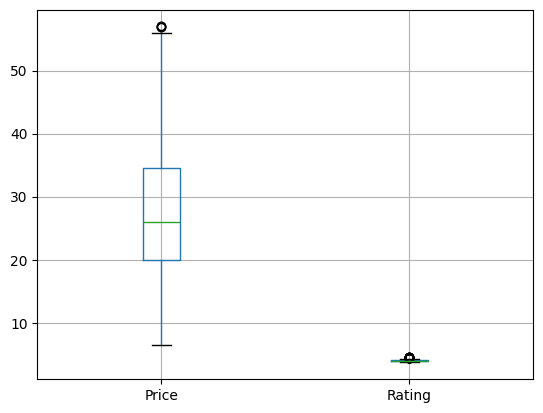

In [8]:
import matplotlib.pyplot as plt
wine_df[['Price', 'Rating']].boxplot()
plt.show()


Handle Outliers:

In [9]:
q1 = wine_df['Price'].quantile(0.25)
q3 = wine_df['Price'].quantile(0.75)
iqr = q3 - q1

# Define bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame
wine_df = wine_df[(wine_df['Price'] >= lower_bound) & (wine_df['Price'] <= upper_bound)]


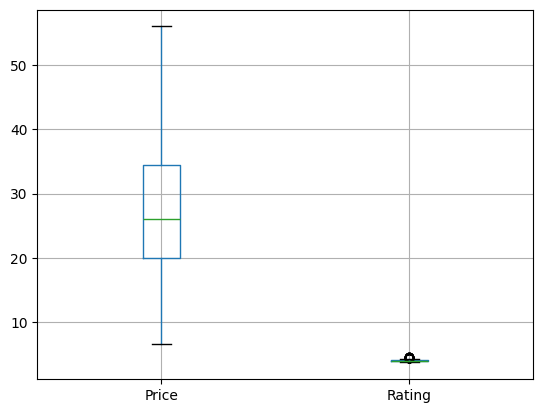

In [10]:
wine_df[['Price', 'Rating']].boxplot()
plt.show()


In [11]:
print(wine_df.info())
print(wine_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 1 to 5144
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2923 non-null   int64  
 1   Name               2923 non-null   object 
 2   Rating             2923 non-null   float64
 3   Number of Ratings  2923 non-null   int64  
 4   Price              2923 non-null   float64
 5   Winery             2923 non-null   object 
 6   Wine style         2923 non-null   object 
 7   Alcohol content    2923 non-null   float64
 8   Grapes             2923 non-null   object 
 9   Food pairings      2923 non-null   object 
 10  Bold               2923 non-null   float64
 11  Tannin             2923 non-null   float64
 12  Sweet              2923 non-null   float64
 13  Acidic             2923 non-null   float64
 14  Country            2923 non-null   object 
 15  Country_region     2923 non-null   object 
 16  Beef               2923 non-n

SyntaxError: invalid character '§' (U+00A7) (776680368.py, line 3)